## Project Work comparisons

In this notebook we take the volume distributions and plot their histograms.
- chest
- bonsai
- battery

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def plot_histograms(gt, pred, title, log):
    gt_values = gt.flatten()
    pred_values = pred.flatten()

    plt.figure(figsize=(6, 4))
    plt.hist(gt_values, bins=50, alpha=0.5, label="Ground Truth", color="blue", density=True, log=log)
    plt.hist(pred_values, bins=50, alpha=0.5, label="Prediction", color="red", density=True, log=log)

    plt.xlabel("Voxel Intensity")
    plt.ylabel("Density")
    plt.legend()
    plt.title(title)
    plt.grid(True)

    plt.show()


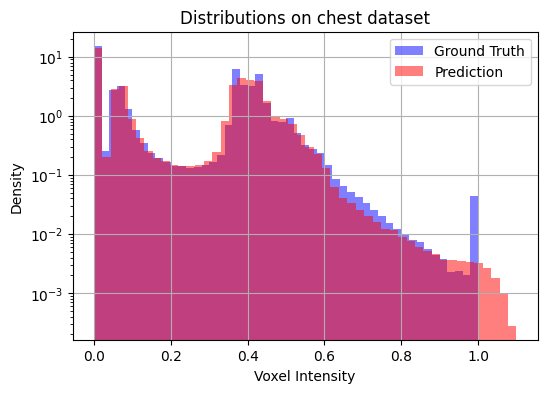

In [10]:
# Chest
gt_volume = np.load("../data/volume_distrib/chest/image_gt.npy")
pred_volume = np.load("../data/volume_distrib/chest/image_pred.npy")
plot_histograms(gt_volume, pred_volume, "Distributions on chest dataset", True)

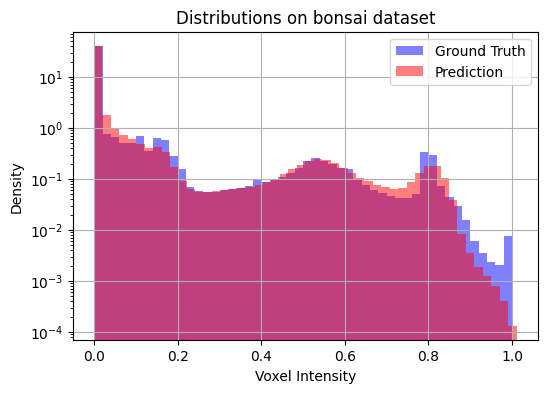

In [9]:
# Bonsai
gt_volume = np.load("../data/volume_distrib/bonsai/image_gt.npy")
pred_volume = np.load("../data/volume_distrib/bonsai/image_pred.npy")
plot_histograms(gt_volume, pred_volume, "Distributions on bonsai dataset", True)

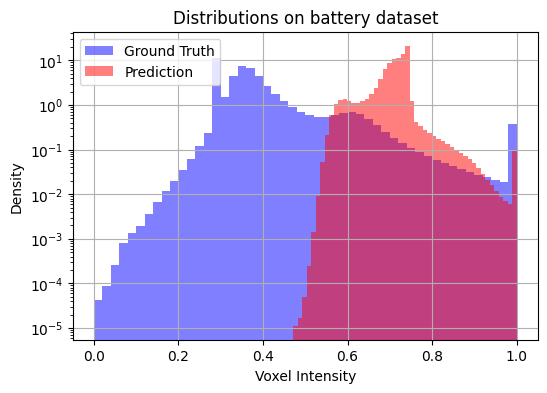

In [17]:
# Battery
gt_volume = np.load("../data/volume_distrib/battery/fbp_enh.npy")
pred_volume = np.load("../data/volume_distrib/battery/image_pred.npy")
plot_histograms(gt_volume, pred_volume, "Distributions on battery dataset", True)

## Thesis comparisons

Now I compare the volumes of the battery dataset(s). Volumes are saved as .tif

In [1]:
import tifffile as tiff

# Path to your .tif file
file_path = '../data/z-volumes/fbp/FBP.tif'
#file_path = '../data/z-volumes/OSEM_it20.tif'
#file_path = '../data/phase_ct/PhaseCT_reconst.tif'

fbp_volume = tiff.imread(file_path)

print(f"Volume shape: {fbp_volume.shape}")
print(f"Min: {fbp_volume.min()}, max: {fbp_volume.max()}")

Volume shape: (1024, 1024, 1024)
Min: -0.006318939849734306, max: 0.02782643772661686


I plot the histogram of the FBP volume (our ground truth).

In [2]:
import matplotlib.pyplot as plt

def plot_histogram(volume, title):
    flattened_volume = volume.flatten()
    plt.figure(figsize=(6, 4))
    plt.hist(flattened_volume, bins=100, color='blue', alpha=0.7, log=True)
    plt.title(title)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

def plot_pair_histograms(vol1, vol2, title1, title2, log=False):
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))  # 1 row, 2 columns

    # Plot first histogram
    axes[0].hist(vol1.flatten(), bins=50, color='blue', alpha=0.7, log=log)
    axes[0].set_title(title1)
    axes[0].set_xlabel("Intensity Values")
    axes[0].set_ylabel("Frequency")

    # Plot second histogram
    axes[1].hist(vol2.flatten(), bins=50, color='red', alpha=0.7, log=log)
    axes[1].set_title(title2)
    axes[1].set_xlabel("Intensity Values")
    axes[1].set_ylabel("Frequency")

    # Adjust layout and show
    plt.tight_layout()
    plt.show()

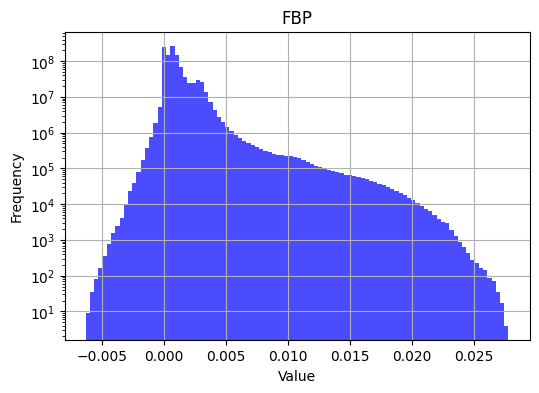

In [3]:
plot_histogram(fbp_volume, 'FBP')

There is some resizing to do and get a volume of 256x256x256 using biliner interpolation.

In [4]:
import numpy as np
from scipy.ndimage import zoom

scale_factor = 256 / 1024  # Compute the scaling factor

# Resize using interpolation (order=1 for bilinear, order=3 for cubic)
fbp_volume_256 = zoom(fbp_volume, (scale_factor, scale_factor, scale_factor), order=1)  # Use order=3 for cubic interpolation

fbp_volume_256.shape

(256, 256, 256)

In [5]:
print('shape:', fbp_volume_256.shape)
print('min max', fbp_volume_256.min(), fbp_volume_256.max())

shape: (256, 256, 256)
min max -0.004392732 0.026117621


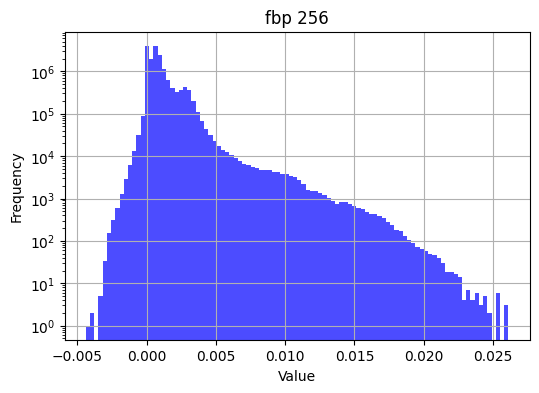

In [6]:
plot_histogram(fbp_volume_256, 'fbp 256')

Now I plot the histogram of the volume of R2Gaussian (id 22) 

In [85]:
import numpy as np
#r2gaus_vol = np.load('../data/z-bin/shuffle/volume_r2gaus_gt.npy')
r2gaus_vol = np.load('../data/id_volumes/id_34.npy')

print('shape:', r2gaus_vol.shape)
print('min max', r2gaus_vol.min(), r2gaus_vol.max())

shape: (256, 256, 256)
min max 0.0024041045 13.342978


In [86]:
# Swap axes
volume = r2gaus_vol
volume = np.swapaxes(volume, 0, 1)
volume = np.swapaxes(volume, 0, 2) # shape: (256, 256, 256)

# Invert projections
volume = volume[::-1, :, :]

# Rotate counterclockwise 90 degrees
volume = np.rot90(volume, k=1, axes=(1, 2))

# Flip along vertical axis
volume = volume[:, :, ::-1]
r2gaus_vol = volume

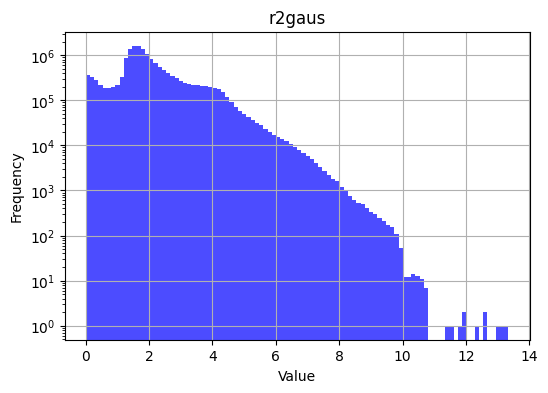

In [87]:
plot_histogram(r2gaus_vol, 'r2gaus')

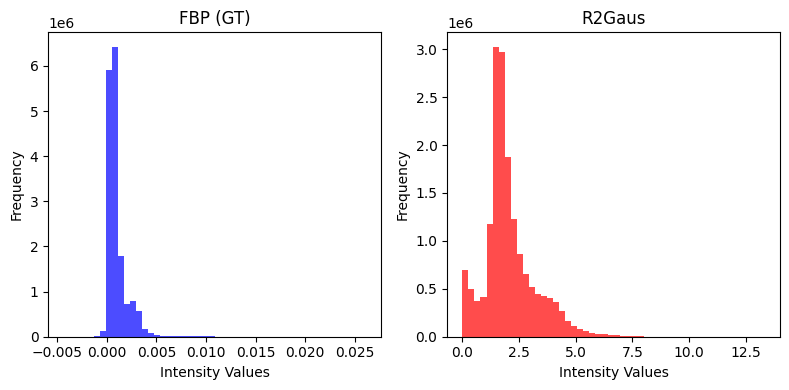

In [88]:
plot_pair_histograms(fbp_volume_256, r2gaus_vol, 'FBP (GT)', 'R2Gaus')

In [85]:
# little saving to npy to see in napari if the volumes match
#np.save('../data/z-bin/tmp/fbp_volume_256.npy', fbp_volume_256)
#np.save('../data/z-bin/tmp/r2gaus_volume_256.npy', r2gaus_vol)
print('saved')

saved


Now we normalize the FDK and R2Gaus volumes in 0-1.

In [89]:
def normalize_volume(volume):
    min_val = np.min(volume)
    max_val = np.max(volume)
    return (volume - min_val) / (max_val - min_val) if max_val > min_val else volume

fbp_volume_256_norm = normalize_volume(fbp_volume_256)
r2gaus_vol_norm = normalize_volume(r2gaus_vol)

print(f'now FBP is in {fbp_volume_256_norm.min()} - {fbp_volume_256_norm.max()}')
print(f'now R2GAUS is in {r2gaus_vol_norm.min()} - {r2gaus_vol_norm.max()}')

now FBP is in 0.0 - 1.0
now R2GAUS is in 0.0 - 1.0


In [90]:
def plot_two_histograms(data1, data2, bins=50, title1="Histogram 1", title2="Histogram 2", xlabel="Value", ylabel="Frequency"):
    plt.figure(figsize=(8, 4))
    plt.hist(data1.flatten(), bins=bins, alpha=0.5, color='blue', label=title1)
    plt.hist(data2.flatten(), bins=bins, alpha=0.5, color='red', label=title2)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title("Histograms")
    plt.legend()
    plt.grid(True)
    plt.show()

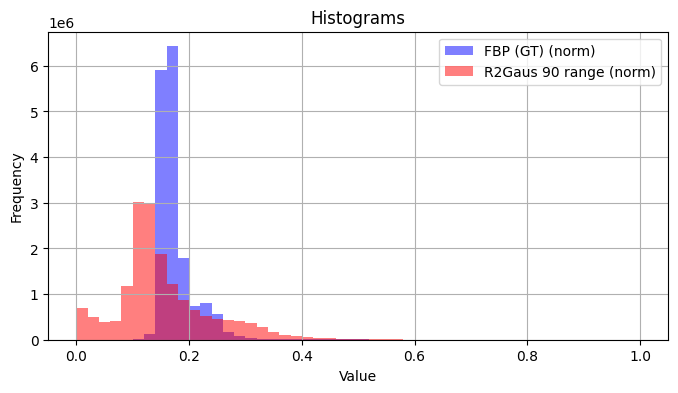

In [91]:
plot_two_histograms(fbp_volume_256_norm, r2gaus_vol_norm, title1='FBP (GT) (norm)', title2='R2Gaus 90 range (norm)')

In [92]:
compute_psnr(fbp_volume_256_norm, r2gaus_vol_norm)

22.487648208681744

In [93]:
compute_ssim(fbp_volume_256_norm, r2gaus_vol_norm)

0.6933590749376899

Now we find the derivatives of each volume.

In [57]:
from scipy.ndimage import sobel

def sobelize(volume):
    sobel_x = sobel(volume, axis=0)
    sobel_y = sobel(volume, axis=1)
    sobel_z = sobel(volume, axis=2)
    return np.sqrt(sobel_x**2 + sobel_y**2 + sobel_z**2)

In [58]:
# FBP volume gets "sobelized"
fbp_volume_256_sobel = sobelize(fbp_volume_256)
fbp_volume_256_sobel.min(), fbp_volume_256_sobel.max()

(0.0, 0.34816796)

In [54]:
np.save('../data/z-bin/tmp/fbp_volume_256_sobel.npy', fbp_volume_256_sobel)

In [59]:
# R2gaus gets "sobelized"
r2gaus_vol_sobel = sobelize(r2gaus_vol)
r2gaus_vol_sobel.min(), r2gaus_vol_sobel.max()

(0.0020587174, 184.83894)

In [60]:
np.save('../data/z-bin/tmp/r2gaus_volume_256_sobel.npy', r2gaus_vol_sobel)

Plot now the histograms of the sobelized volumes

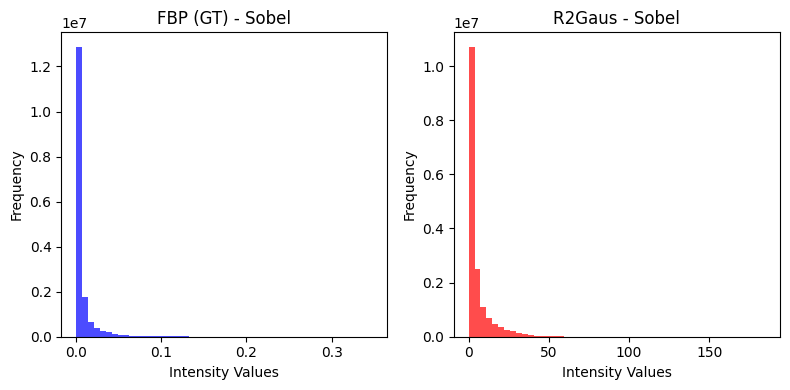

In [61]:
plot_pair_histograms(fbp_volume_256_sobel, r2gaus_vol_sobel, 'FBP (GT) - Sobel', 'R2Gaus - Sobel')

Now we normalize the volume derivatives

In [62]:
fbp_volume_256_sobel_norm = normalize_volume(fbp_volume_256_sobel)
r2gaus_vol_sobel_norm = normalize_volume(r2gaus_vol_sobel)


In [63]:
print(fbp_volume_256_sobel_norm.min(), fbp_volume_256_sobel_norm.max())
print(r2gaus_vol_sobel_norm.min(), r2gaus_vol_sobel_norm.max())

0.0 1.0
0.0 1.0


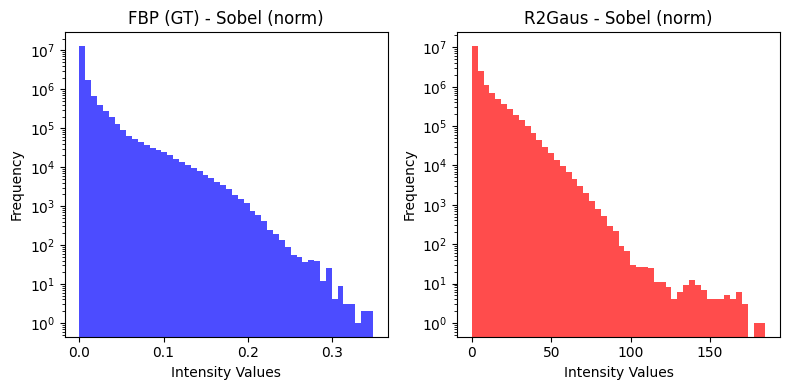

In [66]:
plot_pair_histograms(fbp_volume_256_sobel, r2gaus_vol_sobel, 'FBP (GT) - Sobel (norm)', 'R2Gaus - Sobel (norm)', log=True)

In [67]:
np.save('../data/z-bin/tmp/fbp_volume_256_sobel_norm.npy', fbp_volume_256_sobel_norm)
np.save('../data/z-bin/tmp/r2gaus_volume_256_sobel_norm.npy', r2gaus_vol_sobel_norm)
print('saved')

saved


This is the metric computation part

In [14]:
import numpy as np
import torch
from skimage.metrics import peak_signal_noise_ratio
from skimage.metrics import structural_similarity as ssim

def compute_psnr(prediction, reference):
    """
    Computes the Peak Signal-to-Noise Ratio (PSNR) between two 3D volumes.
    
    :param prediction: NumPy array representing the predicted volume.
    :param reference: NumPy array representing the reference (ground truth) volume.
    :return: PSNR value in dB.
    """
    return peak_signal_noise_ratio(reference, prediction, data_range=reference.max() - reference.min())

import numpy as np
import torch
from skimage.metrics import structural_similarity as ssim

def compute_ssim(arr1, arr2, size_average=True):
    """
    Compute 3D SSIM by averaging SSIM along depth, height, and width dimensions.

    :param arr1: [NDHW] NumPy array or PyTorch tensor (normalized between 0 and 1).
    :param arr2: [NDHW] NumPy array or PyTorch tensor.
    :param size_average: If True, return the mean SSIM across all batches, else return per-batch SSIM.
    :return: Scalar SSIM value or array of SSIM values per batch.
    """
    # Convert PyTorch tensors to NumPy if necessary
    if torch.is_tensor(arr1):
        arr1 = arr1.cpu().detach().numpy()
    if torch.is_tensor(arr2):
        arr2 = arr2.cpu().detach().numpy()

    assert arr1.shape == arr2.shape, "Input arrays must have the same shape!"
    arr1 = arr1.astype(np.float64)
    arr2 = arr2.astype(np.float64)

    # Add batch dimension
    arr1 = arr1[np.newaxis, ...]
    arr2= arr2[np.newaxis, ...]

    # Compute data_range dynamically
    data_range = arr1.max() - arr1.min()

    N = arr1.shape[0]

    # Compute SSIM along Depth (D)
    arr1_d = np.transpose(arr1, (0, 2, 3, 1))
    arr2_d = np.transpose(arr2, (0, 2, 3, 1))
    ssim_d = [ssim(arr1_d[i], arr2_d[i], data_range=data_range) for i in range(N)]
    
    # Compute SSIM along Height (H)
    arr1_h = np.transpose(arr1, (0, 1, 3, 2))
    arr2_h = np.transpose(arr2, (0, 1, 3, 2))
    ssim_h = [ssim(arr1_h[i], arr2_h[i], data_range=data_range) for i in range(N)]
    
    # Compute SSIM along Width (W)
    ssim_w = [ssim(arr1[i], arr2[i], data_range=data_range) for i in range(N)]

    # Convert lists to NumPy arrays
    ssim_d = np.asarray(ssim_d, dtype=np.float64)
    ssim_h = np.asarray(ssim_h, dtype=np.float64)
    ssim_w = np.asarray(ssim_w, dtype=np.float64)

    # Compute final SSIM as the mean of three orientations
    ssim_avg = (ssim_d + ssim_h + ssim_w) / 3

    return ssim_avg.mean() if size_average else ssim_avg


In [70]:
compute_ssim(fbp_volume_256_sobel_norm, r2gaus_vol_sobel_norm)

0.7004058042227929

In [71]:
compute_psnr(fbp_volume_256_sobel_norm, r2gaus_vol_sobel_norm)

25.882793828427893